In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
dataframe = pd.read_csv('Data/movie.metadata.genres.tsv', sep='\t')


# create a column with release month column

dataframe['Movie release Month'] = dataframe['Movie release date'].str[5:7]

#Convert string to int for month
dataframe['Movie release Month'] = pd.to_numeric(dataframe['Movie release Month'], errors='raise') #Check si les strings sont autres que des nombres

display(dataframe)

,Unnamed: 0,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie release Year,genre 1,genre 2,Movie release Month
0,0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,NaN,10
1,1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,NaN,10
2,2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,NaN,10
3,3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}",1894,NaN,NaN,10
4,4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1894,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42661,42661,35042288,/m/0j630fh,Bulbul,2014-07,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2014,NaN,NaN,7
42662,42662,36534974,/m/0kdy118,Noah,2014-03-28,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",2014,Drama,NaN,3
42663,42663,35764246,/m/0jt01_6,Appayya,2014-08-15,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2014,Romance,NaN,8
42664,42664,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},2016,NaN,NaN,3


In [5]:
# Takes out all the years where the number of movies is under 200

film_counts_year_without_missing_months = dataframe['Movie release Year'].value_counts().sort_index()

df2 = dataframe.copy(deep = True)

years_under_200 = film_counts_year_without_missing_months.index[film_counts_year_without_missing_months.values > 200]
df2 = df2[df2['Movie release Year'].isin(years_under_200)]
#we lose around 800 movies


In [6]:
from helpers import visualizing_data

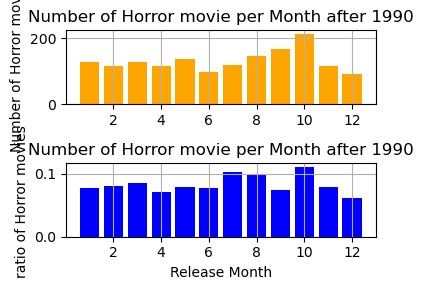

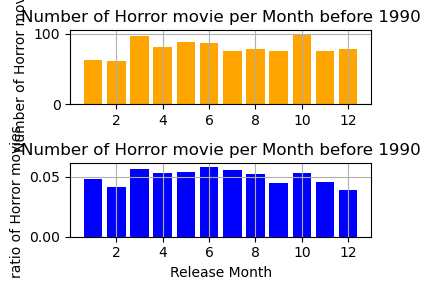

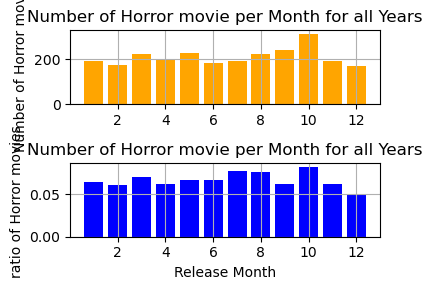

In [7]:
visualizing_data(df2, 1990, 'Horror')

In [75]:
split_year = 1990
df3=df2[~(df2['genre 2'].isna() & df2['genre 1'].isna())] #removing when there 2 NaN : we lose around 4000 movies
df3_90= df3[df3['Movie release Year']>=split_year]  #After 1990 42k -> 20k
df3_90=df3_90.reset_index(drop = True) #don't compute this over and over!!!!
df3_90

,Unnamed: 0,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie release Year,genre 1,genre 2,Movie release Month
0,22263,2278187,/m/0709xh,Miracle Landing,1990-02-11,NaN,85.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1990,Action,Drama,2
1,22264,997939,/m/03xx2x,Kindergarten Cop,1990-12-21,201957688.0,123.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}",1990,Thriller,Action,12
2,22265,3819896,/m/0b1n8y,La voce della luna,1990-02-01,NaN,120.0,"{""/m/03_9r"": ""Japanese Language"", ""/m/02bjrlw""...","{""/m/0f8l9c"": ""France"", ""/m/03rjj"": ""Italy""}",1990,Action,Drama,2
3,22266,246963,/m/01kqq7,Wild at Heart,1990-05,14560247.0,124.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1990,Thriller,Romance,5
4,22267,8758843,/m/027hq_7,Treasure Island,1990-01-22,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1990,Action,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18881,42560,34025292,/m/0gwxf3x,The Five-Year Engagement,2012-04-27,53774508.0,124.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",2012,Romance,Comedy,4
18882,42561,33875334,/m/0hn82bb,The End of Love,2012-01-21,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",2012,Drama,NaN,1
18883,42562,34537226,/m/0h1zb6y,Price Check,2012-01-25,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",2012,Drama,Comedy,1
18884,42563,34821308,/m/0j3cgz3,Crna Zorica,2012-03-20,NaN,80.0,"{""/m/0k0sb"": ""Serbian language""}","{""/m/077qn"": ""Serbia"", ""/m/035qy"": ""Greece""}",2012,Comedy,NaN,3


In [94]:
# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create an empty dataframe
empty_frame = pd.DataFrame(index=range(363),columns=range(2))
nb_countries = empty_frame.rename(columns={0: 'country', 1: 'nb of movies'})
nb_countries['nb of movies'].fillna(0,inplace=True)
i = 0

dfc5 = None
# Iterate over rows of df
for index, row in df3_90.iterrows():
    dfc2 = df3_90.iloc[index]['Movie COuntries']
    dfc3 = json.loads(dfc2)
    dfc4 = pd.json_normalize(dfc3)
    
    for column in dfc4:
        if not (nb_countries['country'].isin([dfc4[column].iloc[0]]).any()):
            nb_countries['country'].iloc[i] = dfc4[column].iloc[0]
            nb_countries['nb of movies'][i] = 1
            i = i+1
        else:
            idx = nb_countries.loc[nb_countries['country'].isin([dfc4[column].iloc[0]])].index
            nb_countries['nb of movies'][idx] = nb_countries['nb of movies'][idx] + 1


In [140]:
nb_countries=nb_countries[(nb_countries['nb of movies']>=5)] #remove countries with less than 5 movies (too long to classify them)
nb_countries = nb_countries.sort_values("nb of movies",ascending=False)
nb_countries = nb_countries.reset_index(drop = True) #don't compute this over and over!!!!
nb_countries.head()


,country,nb of movies
0,United States of America,9002
1,India,2485
2,United Kingdom,1783
3,France,1324
4,Canada,975


In [144]:
searchfor_europe = ['France', 'Italy', 'United Kingdom', 'Slovak Republic', 'Russia', 'Germany', 'Spain', 'Netherlands', 'Sweden', 'Denmark', \
                    'Belgium', 'Ireland', 'Norway', 'Russia', 'Czech Republic', 'Finland', 'Switzerland', 'Portugal', 'Poland', 'Austria', \
                        'Hungary', 'England', 'Luxembourg', 'Romania', 'Iceland', 'Croatia', 'Greece', 'Serbia', 'Bulgaria', 'Slovakia', \
                            'Slovenia', 'Scotland', 'Estonia', 'Bosnia and Herzegovina', 'Lithuania', 'Soviet Union', 'Ukraine', 'Yugoslavia'\
                                'Czechoslovakia	', 'Albania	','Kingdom of Great Britain	', 'Serbia and Montenegro' ]
Europe = nb_countries[nb_countries['country'].str.contains('|'.join(searchfor_europe))]
Europe['continent'] = 'Europe'

searchfor_northa = ['United States', 'Canada' , 'Mexico', 'Australia']
northa = nb_countries[nb_countries['country'].str.contains('|'.join(searchfor_northa))]
northa['continent'] = 'northa'

searchfor_southa = ['Brazil', 'Colombia' , 'Peru', 'Cuba', 'Puerto Rico', 'Venezuela', 'Uruguay', 'Jamaica', 'Argentina']
southa = nb_countries[nb_countries['country'].str.contains('|'.join(searchfor_southa))]
southa['continent'] = 'southa'

searchfor_Asia = ['China', 'Japan' , 'Nepal', 'South Korea', 'Singapore', 'Cambodia', 'Bangladesh', 'Vietnam', 'Lebanon', 'Burma', 'Sri Lanka',\
                   'Palestinian territories', 'Israel', 'Iraq', 'Republic of Macedonia', 'Korea', 'India', 'Hong Kong', 'Philippines', 'Turkey',\
                      'New Zealand', 'Thailand', 'Indonesia', 'Pakistan', 'Iran', 'Taiwan', 'Malaysia', 'United Arab Emirates', 'Afghanistan']
Asia = nb_countries[nb_countries['country'].str.contains('|'.join(searchfor_Asia))]
Asia['continent'] = 'Asia'

searchfor_Africa = ['South Africa', 'Egypt', 'Morocco', 'Algeria', 'Kenya', 'Tunisia', 'Burkina Faso', 'Mali', 'Senegal', 'Democratic Republic of the Congo']
Africa = nb_countries[nb_countries['country'].str.contains('|'.join(searchfor_Africa))]
Africa['continent'] = 'Africa'


In [145]:
#Creating the main genre dataframe so we can modify the original frame
Continent =  pd.concat([Europe, northa, southa, Asia, Africa])
Continent = Continent.reset_index(drop = True)
Continent

,country,nb of movies,continent
0,United Kingdom,1783,Europe
1,France,1324,Europe
2,Germany,956,Europe
3,Italy,359,Europe
4,Spain,323,Europe
...,...,...,...
84,Tunisia,8,Africa
85,Burkina Faso,7,Africa
86,Mali,6,Africa
87,Senegal,5,Africa


In [146]:
# Create empty column for 3 main genres
df3_90['country 1']= None
df3_90['country 2'] = None


# Iterate over rows of df3_90
for index, row in df3_90.iterrows():
        df3_902 = df3_90.iloc[index]['Movie COuntries']
        df3_903 = json.loads(df3_902)
        df3_904 = pd.json_normalize(df3_903)

        for column in df3_904:
                boolarr = (Continent['country'].isin([df3_904[column].iloc[0]]))
                if (boolarr.sum() ==1):
                        main_genre_value = Continent[boolarr]['continent'].values
                        if (df3_90['country 1'].iloc[index] == None):
                                df3_90['country 1'].iloc[index] = main_genre_value
                        elif (df3_90['country 2'].iloc[index] == None and df3_90['country 1'].iloc[index]!= main_genre_value):
                                df3_90['country 2'].iloc[index] = main_genre_value
                #case where a sub genre belongs to more than one main genre: ex: 'Crime Comedy' (iloc[796])
                if (boolarr.sum() ==2):
                        if (df3_90['country 1'].iloc[index] == None and df3_90['country 2'].iloc[796] == None):
                                df3_90['country 1'].iloc[index] = Continent[boolarr]['continent'].iloc[0]
                                df3_90['country 2'].iloc[index] = Continent[boolarr]['continent'].iloc[1]
df3_90.head()

,Unnamed: 0,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie release Year,genre 1,genre 2,Movie release Month,country 1,country 2
0,22263,2278187,/m/0709xh,Miracle Landing,1990-02-11,NaN,85.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1990,Action,Drama,2,[northa],None
1,22264,997939,/m/03xx2x,Kindergarten Cop,1990-12-21,201957688.0,123.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}",1990,Thriller,Action,12,[northa],None
2,22265,3819896,/m/0b1n8y,La voce della luna,1990-02-01,NaN,120.0,"{""/m/03_9r"": ""Japanese Language"", ""/m/02bjrlw""...","{""/m/0f8l9c"": ""France"", ""/m/03rjj"": ""Italy""}",1990,Action,Drama,2,[Europe],None
3,22266,246963,/m/01kqq7,Wild at Heart,1990-05,14560247.0,124.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1990,Thriller,Romance,5,[northa],None
4,22267,8758843,/m/027hq_7,Treasure Island,1990-01-22,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1990,Action,NaN,1,[northa],[Europe]


In [178]:
df_country = df3_90[['Movie name', 'Movie release Year', 'genre 1', 'genre 2', 'Movie release Month', 'country 1', 'country 2']]

'''
northa -> 1
Europe -> 2
southa -> 3
Asia -> 4
Africa -> 5
'''
df_country["country 2"].count() #2143 pays ont dux contintents différents mais on considère que leur country 1 fait l'affaire


df_country['country 1'] = df_country['country 1'].replace(['northa', 'Europe', 'southa', 'Asia', 'Africa'], [1, 2, 3, 4, 5])
df_country

,Movie name,Movie release Year,genre 1,genre 2,Movie release Month,country 1,country 2
0,Miracle Landing,1990,Action,Drama,2,1.0,None
1,Kindergarten Cop,1990,Thriller,Action,12,1.0,None
2,La voce della luna,1990,Action,Drama,2,2.0,None
3,Wild at Heart,1990,Thriller,Romance,5,1.0,None
4,Treasure Island,1990,Action,NaN,1,1.0,[Europe]
...,...,...,...,...,...,...,...
18881,The Five-Year Engagement,2012,Romance,Comedy,4,1.0,None
18882,The End of Love,2012,Drama,NaN,1,1.0,None
18883,Price Check,2012,Drama,Comedy,1,1.0,None
18884,Crna Zorica,2012,Comedy,NaN,3,2.0,None


In [202]:
df_analysis = df_country.copy(deep=True)

df_analysis['horror'] = (df_analysis['genre 1']=='Horror' )| (df_analysis['genre 2']=='Horror' )
df_analysis['horror'] = df_analysis['horror'].replace([True, False], [1, 0])
df_analysis=df_analysis[['horror','Movie release Year', 'Movie release Month', 'country 1']]


In [203]:
df_analysis.rename(columns={"country 1": "country_1"}, inplace=True)
df_analysis.rename(columns={"Movie release Year": "Movie_release_Year"}, inplace=True)

In [204]:
df_analysis=df_analysis[~(df_analysis['country_1'].isna())]
df_analysis

,horror,Movie_release_Year,Movie release Month,country_1
0,0,1990,2,1.0
1,0,1990,12,1.0
2,0,1990,2,2.0
3,0,1990,5,1.0
4,0,1990,1,1.0
...,...,...,...,...
18881,0,2012,4,1.0
18882,0,2012,1,1.0
18883,0,2012,1,1.0
18884,0,2012,3,2.0


In [205]:
import statsmodels.formula.api as smf

In [206]:
# let's standardize the continuous features
df_analysis['Movie_release_Year'] = (df_analysis['Movie_release_Year'] - df_analysis['Movie_release_Year'].mean())/df_analysis['Movie_release_Year'].std()


df_analysis['country_1'] = (df_analysis['country_1'] - df_analysis['country_1'].mean())/df_analysis['country_1'].std()


In [207]:

mod = smf.logit(formula='horror ~  Movie_release_Year + country_1', data=df_analysis)

res = mod.fit()

# Extract the estimated propensity scores
df_analysis['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.284707
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 horror   No. Observations:                17590
Model:                          Logit   Df Residuals:                    17587
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                 0.01079
Time:                        18:06:13   Log-Likelihood:                -5008.0
converged:                       True   LL-Null:                       -5062.6
Covariance Type:            nonrobust   LLR p-value:                 1.914e-24
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.4283      0.028    -86.239      0.000      -2.483      -2.373
Movie

In [208]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [209]:
import networkx as nx

In [230]:
df_analysis_sample = df_analysis.sample(frac=0.1, random_state=1)
df_analysis_sample

,horror,Movie_release_Year,Movie release Month,country_1,Propensity_score
2639,0,-1.238329,5,0.021475,0.064664
13762,0,0.753339,2,0.021475,0.092032
9177,0,0.255422,9,-0.772107,0.101413
13480,0,0.753339,5,-0.772107,0.110469
7810,1,0.089450,9,-0.772107,0.098544
...,...,...,...,...,...
5265,0,-0.574440,12,0.021475,0.072820
7539,0,-0.076523,2,-0.772107,0.095748
5547,0,-0.408468,8,1.608640,0.051248
2698,0,-1.238329,7,1.608640,0.044028


In [231]:
# Separate the treatment and control groups
treatment_df = df_analysis_sample[df_analysis_sample['horror'] == 1]
control_df = df_analysis_sample[df_analysis_sample['horror'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [232]:
df_analysis_sample['horror'].sum()

152

In [233]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

In [234]:
balanced_df_1 = df_analysis.loc[matched]

In [235]:
balanced_df_1

,horror,Movie_release_Year,Movie release Month,country_1,Propensity_score
4567,0,-0.740412,8,-0.772107,0.085260
6442,0,-0.242495,2,-0.772107,0.093022
10222,0,0.421394,8,0.021475,0.086840
8985,0,0.255422,1,-0.772107,0.101413
1058,0,-1.902219,5,-0.772107,0.069388
...,...,...,...,...,...
9641,1,0.255422,7,-0.772107,0.101413
18729,1,1.417228,5,-0.772107,0.123638
11218,1,0.587367,5,-0.772107,0.107374
13932,1,0.919311,1,-0.772107,0.113641


In [236]:
import seaborn as sns

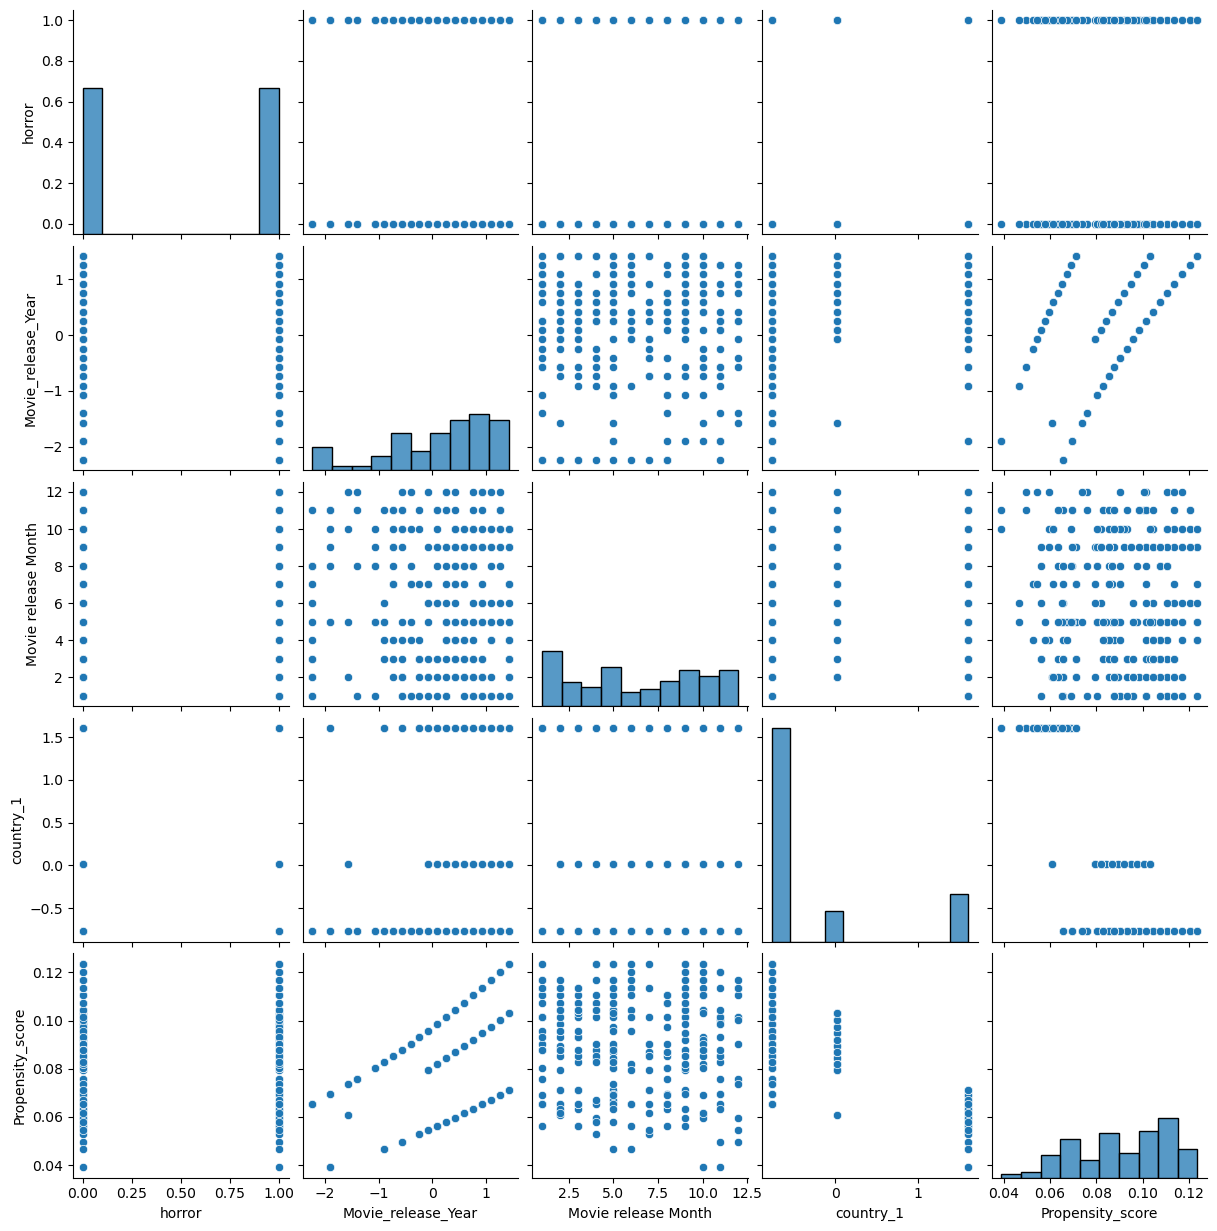

In [237]:
sns.pairplot(balanced_df_1)